<a href="https://colab.research.google.com/github/RohanMathur17/Deep-Learning-With-Python-By-Francois-Chollet/blob/master/Chapter%204/CH4_Improving_Models_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from keras.datasets import imdb

(train_data , train_labels) , (test_data , test_labels) = imdb.load_data(num_words = 10000)   #Keeping the top 10,000 words

In [9]:
#Prevent Overfitting
from keras import models
from keras import layers

In [10]:
import numpy as np

def vectorize_sequences(sequences , dimension = 10000):

    results = np.zeros((len(sequences), dimension))  #Creates an all-zero matrix of shape (len(sequences), dimension

    for i,sequence in enumerate(sequences):

        results[i,sequence] = 1

    return results

In [11]:
#Vectorizing data

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#Vectorizing labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer = 'rmsprop',                    #Optimizer,loss, metrics can be configured on your own as well
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

#Validating our approach

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:

#Training your model

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5466 - acc: 0.7708 - val_loss: 0.4129 - val_acc: 0.8733
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3355 - acc: 0.8983 - val_loss: 0.3207 - val_acc: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2418 - acc: 0.9255 - val_loss: 0.2929 - val_acc: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1899 - acc: 0.9414 - val_loss: 0.2755 - val_acc: 0.8909
Epoch 5/20
30/30 [==============================] - 2s 50ms/step - loss: 0.1538 - acc: 0.9524 - val_loss: 0.2743 - val_acc: 0.8896
Epoch 6/20
30/30 [==============================] - 2s 50ms/step - loss: 0.1254 - acc: 0.9623 - val_loss: 0.3494 - val_acc: 0.8630
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1058 - acc: 0.9693 - val_loss: 0.2957 - val_acc: 0.8844
Epoch 8/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0860 - a

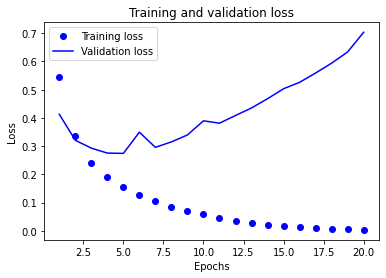

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['val_acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

In [16]:
#Adding Dropout

model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model1.compile(optimizer = 'rmsprop',                    #Optimizer,loss, metrics can be configured on your own as well
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model1.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

model1.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

#Training your model

model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history1 = model1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 63ms/step - loss: 0.6177 - acc: 0.6563 - val_loss: 0.4967 - val_acc: 0.8477
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.4952 - acc: 0.7803 - val_loss: 0.4068 - val_acc: 0.8709
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.4183 - acc: 0.8438 - val_loss: 0.3448 - val_acc: 0.8792
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3604 - acc: 0.8740 - val_loss: 0.3049 - val_acc: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3124 - acc: 0.8913 - val_loss: 0.2869 - val_acc: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2726 - acc: 0.9090 - val_loss: 0.2807 - val_acc: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2417 - acc: 0.9227 - val_loss: 0.2805 - val_acc: 0.8881
Epoch 8/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2148 - a

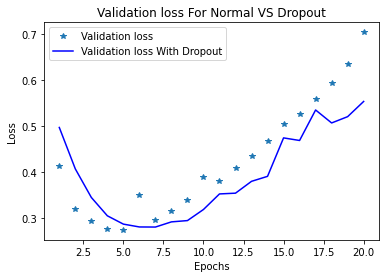

In [21]:
history_dict1 = history1.history
val_loss_values_dropout = history_dict1['val_loss']

epochs = range(1, len(history_dict1['val_acc']) + 1)

plt.plot(epochs, val_loss_values, '*', label='Validation loss')
plt.plot(epochs, val_loss_values_dropout, 'b', label='Validation loss With Dropout')

plt.title('Validation loss For Normal VS Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()